# **HW1: Regression**
In *assignment 1*, you need to finish:

1.  Basic Part: Implement two regression models to predict the Systolic blood pressure (SBP) of a patient. You will need to implement **both Matrix Inversion and Gradient Descent**.


> *   Step 1: Split Data
> *   Step 2: Preprocess Data
> *   Step 3: Implement Regression
> *   Step 4: Make Prediction
> *   Step 5: Train Model and Generate Result

2.  Advanced Part: Implement one regression model to predict the SBP of multiple patients in a different way than the basic part. You can choose **either** of the two methods for this part.

# **1. Basic Part (55%)**
In the first part, you need to implement the regression to predict SBP from the given DBP


## 1.1 Matrix Inversion Method (25%)


*   Save the prediction result in a csv file **hw1_basic_mi.csv**
*   Print your coefficient


### *Import Packages*

> Note: You **cannot** import any other package

In [319]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import math
import random

### *Global attributes*
Define the global attributes

In [320]:
training_dataroot = 'hw1_basic_training.csv' # Training data file file named as 'hw1_basic_training.csv'
testing_dataroot = 'hw1_basic_testing.csv'   # Testing data file named as 'hw1_basic_training.csv'
output_dataroot = 'hw1_basic_mi.csv' # Output file will be named as 'hw1_basic.csv'

training_datalist =  [] # Training datalist, saved as numpy array
testing_datalist =  [] # Testing datalist, saved as numpy array

output_datalist =  [] # Your prediction, should be 20 * 1 matrix and saved as numpy array
                      # The format of each row should be ['sbp']


You can add your own global attributes here


In [321]:
validating_datalist = []

### *Load the Input File*
First, load the basic input file **hw1_basic_training.csv** and **hw1_basic_testing.csv**

Input data would be stored in *training_datalist* and *testing_datalist*

In [322]:
# Read input csv to datalist
with open(training_dataroot, newline='') as csvfile:
  training_datalist = np.array(list(csv.reader(csvfile))[1::]).astype(int)
with open(testing_dataroot, newline='') as csvfile:
  testing_datalist = np.array(list(csv.reader(csvfile))[1::]).astype(int)

### *Implement the Regression Model*

> Note: It is recommended to use the functions we defined, you can also define your own functions


#### Step 1: Split Data
Split data in *training_datalist* into training dataset and validation dataset
* Validation dataset is used to validate your own model without the testing data



In [323]:
np.random.seed(98746)
def SplitData():
  global training_datalist
  global validating_datalist

  num_samples = len(training_datalist)
  split_ratio = 0.8
  split_index = int(num_samples * split_ratio)

  indices = np.arange(num_samples)
  np.random.shuffle(indices)

  train_indices = indices[:split_index]
  val_indices = indices[split_index:]

  train_indices.sort()
  val_indices.sort()
  training_datalist, validating_datalist = training_datalist[train_indices], training_datalist[val_indices]
SplitData()

#### Step 2: Preprocess Data
Handle the unreasonable data
> Hint: Outlier and missing data can be handled by removing the data or adding the values with the help of statistics  

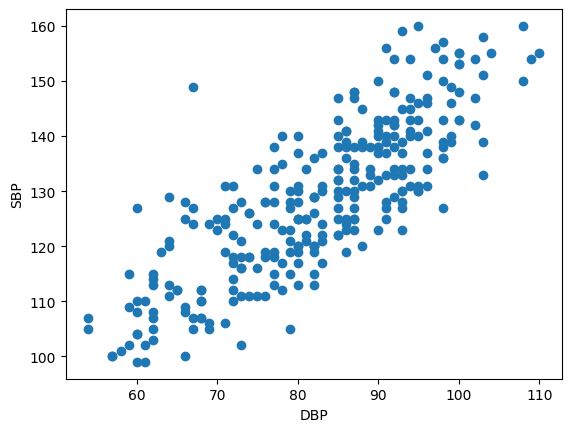

In [324]:
def PreprocessData():
  global training_datalist
  sbp = training_datalist[:, 0]
  dbp = training_datalist[:, 1]
  # print(sbp)
  sbp_avg = np.mean(sbp)
  sbp_std = np.std(sbp)

  dbp_avg = np.mean(dbp)
  dbp_std = np.std(dbp)

  threshold = 2.0
  sbp_z_scores = np.abs((sbp - sbp_avg) / sbp_std)
  dbp_z_scores = np.abs((dbp - dbp_avg) / dbp_std)

  sbp_outliers = sbp_z_scores > threshold
  dbp_outliers = dbp_z_scores > threshold
  outlier_mask = sbp_outliers | dbp_outliers

  training_datalist = training_datalist[~outlier_mask]
  # print(training_datalist)
  plt.scatter(training_datalist[:, 0], training_datalist[:, 1])
  plt.ylabel('SBP')
  plt.xlabel('DBP')
  plt.show()
PreprocessData()

#### Step 3: Implement Regression
> use Matrix Inversion to finish this part




In [325]:
def MatrixInversion(input_datalist):
  dbp = input_datalist[:, 0]
  sbp = input_datalist[:, 1]
  d = 1
  n = len(dbp)

  X = np.zeros((n, d+1))
  X[:,0] = 1
  X[:,1] = dbp
  return np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T).dot(sbp)

### Evaluate MAPE

In [326]:
def EvaluateMAPE(w):
  dbp = validating_datalist[:, 0]
  sbp = validating_datalist[:, 1]
  sbp_p = w[0] + w[1]*dbp
  N = len(validating_datalist)
  MAPE = sum(abs(sbp-sbp_p)/sbp)/N
  return MAPE

#### Step 4: Make Prediction
Make prediction of testing dataset and store the value in *output_datalist*
The final *output_datalist* should look something like this
> [ [100], [80], ... , [90] ] where each row contains the predicted SBP

In [327]:
def MakePrediction(w):
  global output_datalist
  dbp = testing_datalist[:, 0]
  output_datalist = w[0] + w[1]*dbp

#### Step 5: Train Model and Generate Result

> Notice: **Remember to output the coefficients of the model here**, otherwise 5 points would be deducted
* If your regression model is *3x^2 + 2x^1 + 1*, your output would be:
```
3 2 1
```





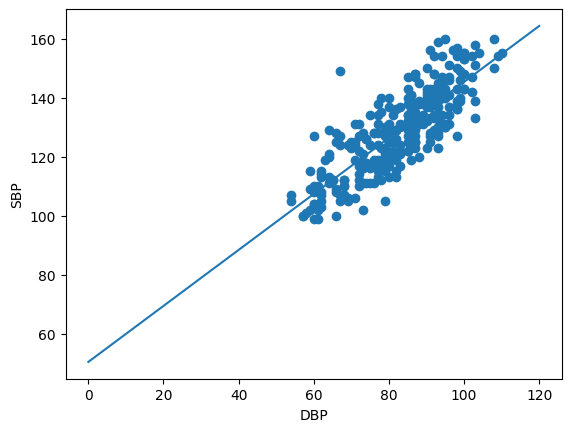

MAPE = 0.06186261310171651
0.9494971091803901 50.39231839528601


In [328]:
w = MatrixInversion(training_datalist)
plt.scatter(training_datalist[:, 0], training_datalist[:, 1])
x = np.linspace(0,120)
plt.plot(x, x * w[1] + w[0])
plt.ylabel('SBP')
plt.xlabel('DBP')
plt.show()
print("MAPE =",EvaluateMAPE(w))
MakePrediction(w)
print(' '.join(map(str, w[::-1])))

### *Write the Output File*
Write the prediction to output csv
> Format: 'sbp'




In [329]:
with open(output_dataroot, 'w', newline='', encoding="utf-8") as csvfile:
  writer = csv.writer(csvfile)
  for row in output_datalist:
    writer.writerow([row])

## 1.2 Gradient Descent Method (30%)


*   Save the prediction result in a csv file **hw1_basic_gd.csv**
*   Output your coefficient update in a csv file **hw1_basic_coefficient.csv**
*   Print your coefficient





### *Global attributes*

In [330]:
output_dataroot = 'hw1_basic_gd.csv' # Output file will be named as 'hw1_basic.csv'
coefficient_output_dataroot = 'hw1_basic_coefficient.csv'
coefficient_output = [] # Your coefficient update during gradient descent
                   # Should be a (number of iterations * number_of coefficient) matrix
                   # The format of each row should be ['w0', 'w1', ...., 'wn']

Your own global attributes

### *Implement the Regression Model*


#### Step 1: Split Data

In [331]:
def SplitData():
    pass

#### Step 2: Preprocess Data

In [332]:
def PreprocessData():
    pass

#### Step 3: Implement Regression
> use Gradient Descent to finish this part

In [333]:
def GradientDescent(input_datalist, num_iter, eta, lamb = 3):
    dbp = input_datalist[:, 0]
    sbp = input_datalist[:, 1]
    d = 1
    n = len(dbp)
    X = np.zeros((n, d+1))
    X[:,0] = 1
    X[:,1] = dbp
    w = np.zeros((d+1))
    w[0] = 60
    w[1] = 1
    coefficient_output.append(w[::-1])
    for i in range(num_iter):
        # w' = w - ag
        y_predict = np.dot(w, X.T)
        g = -(1/n)*np.dot((sbp - y_predict).T, X) + lamb * w
        # print(g)
        w = w - eta*g
        coefficient_output.append(w[::-1])
    return w
num_iter = 1000
learning_rate = 1e-4

### Evaluate MAPE

In [334]:
def EvaluateMAPE(w):
  dbp = validating_datalist[:, 0]
  sbp = validating_datalist[:, 1]
  sbp_p = w[0] + w[1]*dbp
  N = len(validating_datalist)
  MAPE = sum(abs(sbp-sbp_p)/sbp)/N
  return MAPE

#### Step 4: Make Prediction

Make prediction of testing dataset and store the values in *output_datalist*
The final *output_datalist* should look something like this
> [ [100], [80], ... , [90] ] where each row contains the predicted SBP

Remember to also store your coefficient update in *coefficient_output*
The final *coefficient_output* should look something like this
> [ [1, 0, 3, 5], ... , [0.1, 0.3, 0.2, 0.5] ] where each row contains the [w0, w1, ..., wn] of your coefficient





In [335]:
def MakePrediction(w):
    global output_datalist
    dbp = testing_datalist[:,0]
    output_datalist = w[0] + w[1] * dbp

#### Step 5: Train Model and Generate Result

> Notice: **Remember to output the coefficients of the model here**, otherwise 5 points would be deducted
* If your regression model is *3x^2 + 2x^1 + 1*, your output would be:
```
3 2 1
```



In [336]:
w = GradientDescent(training_datalist, num_iter, learning_rate)
print("MAPE =",EvaluateMAPE(w))
MakePrediction(w)
print(' '.join(map(str, w[::-1])))

MAPE = 0.06163099146665143
0.964190859872445 49.11718405915251


### *Write the Output File*

Write the prediction to output csv
> Format: 'sbp'

**Write the coefficient update to csv**
> Format: 'w0', 'w1', ..., 'wn'
>*   The number of columns is based on your number of coefficient
>*   The number of row is based on your number of iterations

In [280]:
with open(output_dataroot, 'w', newline='', encoding="utf-8") as csvfile:
  writer = csv.writer(csvfile)
  for row in output_datalist:
    writer.writerow([row])

with open(coefficient_output_dataroot, 'w', newline='', encoding="utf-8") as csvfile:
  writer = csv.writer(csvfile)
  for row in coefficient_output:
    writer.writerow(row)

# **2. Advanced Part (40%)**
In the second part, you need to implement the regression in a different way than the basic part to help your predictions of multiple patients SBP.

You can choose **either** Matrix Inversion or Gradient Descent method.

The training data will be in **hw1_advanced_training.csv** and the testing data will be in **hw1_advanced_testing.csv**.

Output your prediction in **hw1_advanced.csv**

Notice:
> You cannot import any other package other than those given



### Input the training and testing dataset

In [155]:
training_dataroot = 'hw1_advanced_training.csv' # Training data file file named as 'hw1_basic_training.csv'
testing_dataroot = 'hw1_advanced_testing.csv'   # Testing data file named as 'hw1_basic_training.csv'
output_dataroot = 'hw1_advanced.csv' # Output file will be named as 'hw1_basic.csv'

testing_datalist =  [] # Testing datalist, saved as numpy array
input_datalist = []
output_datalist =  [] # Your prediction, should be 220 * 1 matrix and saved as numpy array
                      # The format of each row should be ['sbp']

Global attributes

In [156]:
p_train = [] # training dataset
p_val = []   # validating dataset
patient = []
patient_test = []
num_patient = 11

### Your Implementation

### Preprocess the data

Load data

In [157]:
with open(training_dataroot, newline='') as csvfile:
  input_datalist = np.array(list(csv.reader(csvfile))[1::])
with open(testing_dataroot, newline='') as csvfile:
  testing_datalist = np.array(list(csv.reader(csvfile))[1::])

Split the data for each patient, i-th patient's data should be accessed by **patient[i]**

In [158]:
def SplitData(input_datalist):
    end = []
    last = 0
    for i, row in enumerate(input_datalist):
        if row[0] != input_datalist[last][0]:
            last = i
            end.append(i) # the index of i-th patient's last row
    end.append(len(input_datalist))
    patient = []
    last = 0
    for i in end:
        patient.append(input_datalist[last:i][:,1:])
        last = i
    return patient

Replace the empty data with zeros, change the format of charttime to seconds, and turn the data type of the table from str to float. Finally, remove the outliers.

In [159]:
def TransformData(patient):
  for i in range(num_patient):
    for j in range(len(patient[i])):
      for k in range(len(patient[i][j])):
        if patient[i][j][k] == "":
          patient[i][j][k] = "0"
  for i in range(num_patient):
    for j, charttime in enumerate(patient[i][:,0]):
      s = charttime.split()
      ss = s[2].split(':')
      sec = int(s[0]) * 86400 + int(ss[0])*3600 + int(ss[1])*60 + int(ss[2])
      patient[i][j][0] = sec

  for i, p in enumerate(patient):
    patient[i] = p.astype(float)
  
  return patient


def CleanData(patient): 
  threshold = 2.0
  for i, p in enumerate(patient):
      outlier_mask = np.zeros(len(p[:,0]), dtype=bool)
      for c in range(1, len(p[0])):  # excluding the charttime
          col = p[:, c]
          nonzeros_mask = col != 0.0   # we keep empty data
          # print(zeros_mask)
          col_avg = np.mean(col[nonzeros_mask])
          col_std = np.std(col[nonzeros_mask])
          col_z_score = np.abs((col - col_avg) / col_std)
          col_outliers = col_z_score > threshold
          outlier_mask |= (col_outliers & nonzeros_mask)
      patient[i] = p[~outlier_mask]
  return patient

Fill in the missing data, assuming that the values follow a 24-hour cyclic pattern. The empty values are replaced with the mean of the hour.

In [160]:
def FillData(patient):
    for p in range(num_patient):
        for j in range(1, 5):
            mean = []
            cur_col = patient[p][:,j]        # column to fill the missing data
            # calculate the mean of each hour for the column 
            for i in range(24):
                time_col = patient[p][:,0]   # charttime
                nonzeros_mask = cur_col != 0 # we need to calculate the mean excluding zero values
                mask = (time_col % 86400) < (i + 1) * 3600
                mask &= (time_col % 86400) > i * 3600
                mask &= nonzeros_mask
                m = np.mean(cur_col[mask])
                mean.append(m)
                
            # replace zero values with mean of the hour
            for i, val in enumerate(cur_col):
                if(abs(val - 0.0) < 1e-3):
                    hour = int((time_col[i] % 86400)//3600)
                    expected_value = mean[hour]
                    patient[p][:,j][i] = expected_value
    return patient

Split data into validation and training datasets

In [161]:
def SplitValidation(patient):
    np.random.seed(864540)

    global p_train
    global p_val

    split_ratio = 0.8  # 80% training, 20% validation

    for p in patient:
        num_samples = p.shape[0]
        split_index = int(num_samples * split_ratio)

        indices = np.arange(num_samples)
        np.random.shuffle(indices)

        train_indices = indices[:split_index]
        val_indices = indices[split_index:]

        train_indices.sort()
        val_indices.sort()
        train_data = p[train_indices, :]
        val_data = p[val_indices, :]

        p_train.append(train_data)
        p_val.append(val_data)

Preprocess as a whole:

In [162]:
def PreprocessTrainingData(input_datalist):
    input_datalist = SplitData(input_datalist)
    input_datalist = TransformData(input_datalist)
    input_datalist = CleanData(input_datalist)
    input_datalist = FillData(input_datalist)
    return input_datalist


def PreprocessTestingData(input_datalist):
    input_datalist = SplitData(input_datalist)
    input_datalist = TransformData(input_datalist)
    return input_datalist

### Implement regression

In [163]:
def PHI(input_datalist):
    charttime = (input_datalist[:, 0] % 86400) / 3600
    phi = input_datalist[:, 1:4]
    phi = np.column_stack((charttime, phi))
    phi = np.column_stack((np.ones((phi.shape[0], 1)),  phi))

    return phi


def MatrixInversion(input_datalist):
    ws = [] # weights for all patient
    for p in input_datalist:
        phi = PHI(p)
        y = p[:, 5]
        ws.append(np.linalg.lstsq(phi, y))
    return ws

### Evaluate MAPE

In [164]:
def EvaluateMAPE(w, validating_datalist):
  phi = PHI(validating_datalist)
  
  sbp = validating_datalist[:, 5]
  sbp_p = w.dot(phi.T)

  N = len(validating_datalist)
  MAPE = sum(abs(sbp-sbp_p)/sbp)/N
  return MAPE

### Make prediction

In [165]:
def MakePrediction(w, input_datalist):
    phi = PHI(input_datalist)
  
    return w.dot(phi.T)

### Train model and Generate the Result

In [166]:
# train
patient = PreprocessTrainingData(input_datalist[:])
SplitValidation(patient)
ws = MatrixInversion(patient)

# generate result
patient_test = PreprocessTestingData(testing_datalist[:])
for i in range(num_patient):
  sbp_p = MakePrediction(ws[i], patient_test[i])
  temp = np.column_stack((patient_test[i], sbp_p))
  output_datalist.append(sbp_p)

# print coefficient
for i, w in enumerate(ws):
    print(f"Coefficient for patient {i:2}: ", end = '')
    for j in w:
        print(f"{j:15.10f} ", end = '')
    print()

# calculte MAPE of validating dataset
MAPE_sum = 0
for i in range(num_patient):
  MAPE = EvaluateMAPE(ws[i], p_val[i])
  MAPE_sum += MAPE
  print(f"MAPE for patient {i+1:2d} = {MAPE:.10f}%")
print(f"Average MAPE = {MAPE_sum/num_patient}")

Coefficient for patient  0:  211.6757032030   -0.1744314095   -1.5174354411    0.8676710523    0.7191346409 
Coefficient for patient  1:  811.5389096150    0.0527294810   -7.0344603522    0.3481749561   -0.6790824184 
Coefficient for patient  2:  458.3758118076    0.0087694446   -3.7563520422    0.0708003227    1.1513768296 
Coefficient for patient  3:  517.6377309857    0.2433854214   -3.8237381688   -0.7550781307    2.0925688611 
Coefficient for patient  4: -290.2257032780   -0.0572804048    4.1679889897   -0.0386965631    0.6437098553 
Coefficient for patient  5: -320.9343833633    0.1357990928    4.3779647566    0.1232331794    0.6996828884 
Coefficient for patient  6:  237.9689722087   -0.0694725680   -1.3280146747    0.0209967417    0.5210083852 
Coefficient for patient  7: -107.5655724166   -0.2344235009    2.1599710949    0.1423894422    0.6116276170 
Coefficient for patient  8: -731.0752065071   -0.0987093684    8.9224077355    0.0168661715   -0.4073514323 
Coefficient for pat

### Output your Prediction

> your filename should be **hw1_advanced.csv**

In [167]:
with open(output_dataroot, 'w', newline='', encoding="utf-8") as csvfile:
  writer = csv.writer(csvfile)
  for row in output_datalist:
    for r in row:
      writer.writerow([r])

# Report *(5%)*

Report should be submitted as a pdf file **hw1_report.pdf**

*   Briefly describe the difficulty you encountered
*   Summarize your work and your reflections
*   No more than one page






# Save the Code File
Please save your code and submit it as an ipynb file! (**hw1.ipynb**)